In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Statistical Tests
import scipy.stats as stats
from scipy.stats import norm
# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime
pd.options.display.float_format = '{:20,.2f}'.format
import env


In [2]:
import wrangle

from wrangle import get_zillow_data

In [3]:
df = pd.read_csv('zillowcluster_df.csv')

In [4]:
df.head()

Unnamed: 0  typeconstructiontypeid          storytypeid  \
0           0                     nan                  nan   
1           1                     nan                  nan   
2           2                     nan                  nan   
3           3                     nan                  nan   
4           4                     nan                  nan   

   heatingorsystemtypeid  buildingclasstypeid  architecturalstyletypeid  \
0                   2.00                  nan                       nan   
1                   2.00                  nan                       nan   
2                   2.00                  nan                       nan   
3                   2.00                  nan                       nan   
4                   2.00                  nan                       nan   

   airconditioningtypeid  parcelid       id         basementsqft  ...  \
0                    nan  10711855  1087254                  nan  ...   
1                   1.00  10711877  1072280                  nan  ...   
2                   1.00  10711888  1340933                  nan  ...   
3                    nan  10711910  1878109                  nan  ...   
4                    nan  10711923  2190858                  nan  ...   

    taxdelinquencyyear   censustractandblock             logerror  \
0                  nan 60,371,132,321,007.00                -0.01   
1                  nan 60,371,132,321,007.00                 0.02   
2                  nan 60,371,132,321,007.00                 0.08   
3                  nan 60,371,132,321,008.00                -0.04   
4                  nan 60,371,132,321,008.00                -0.01   

   transactiondate  airconditioningdesc  architecturalstyledesc  \
0       2017-07-07                  NaN                     NaN   
1       2017-08-29              Central                     NaN   
2       2017-04-04              Central                     NaN   
3       2017-03-17                  NaN                     NaN   
4       2017-03-24                  NaN                     NaN   

   buildingclassdesc  heatingorsystemdesc  storydesc  typeconstructiondesc  
0                NaN              Central        NaN                   NaN  
1                NaN              Central        NaN                   NaN  
2                NaN              Central        NaN                   NaN  
3                NaN              Central        NaN                   NaN  
4                NaN              Central        NaN                   NaN  

[5 rows x 68 columns]

In [5]:
df.shape

(77413, 68)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77413 entries, 0 to 77412
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77413 non-null  int64  
 1   typeconstructiontypeid        222 non-null    float64
 2   storytypeid                   50 non-null     float64
 3   heatingorsystemtypeid         49439 non-null  float64
 4   buildingclasstypeid           15 non-null     float64
 5   architecturalstyletypeid      206 non-null    float64
 6   airconditioningtypeid         24953 non-null  float64
 7   parcelid                      77413 non-null  int64  
 8   id                            77413 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77380 non-null  float64
 11  bedroomcnt                    77380 non-null  float64
 12  buildingqualitytypeid         49671 non-null  float64
 13  c

In [7]:
df.describe()

Unnamed: 0  typeconstructiontypeid          storytypeid  \
count            77,413.00                  222.00                50.00   
mean             38,706.00                    6.04                 7.00   
std              22,347.35                    0.56                 0.00   
min                   0.00                    4.00                 7.00   
25%              19,353.00                    6.00                 7.00   
50%              38,706.00                    6.00                 7.00   
75%              58,059.00                    6.00                 7.00   
max              77,412.00                   13.00                 7.00   

       heatingorsystemtypeid  buildingclasstypeid  architecturalstyletypeid  \
count              49,439.00                15.00                    206.00   
mean                    3.92                 3.93                      7.39   
std                     3.59                 0.26                      2.73   
min                     1.00                 3.00                      2.00   
25%                     2.00                 4.00                      7.00   
50%                     2.00                 4.00                      7.00   
75%                     7.00                 4.00                      7.00   
max                    24.00                 4.00                     21.00   

       airconditioningtypeid             parcelid                   id  \
count              24,953.00            77,413.00            77,413.00   
mean                    1.81        13,006,697.32         1,495,761.15   
std                     2.97         3,480,712.14           861,270.67   
min                     1.00        10,711,855.00               349.00   
25%                     1.00        11,538,336.00           752,413.00   
50%                     1.00        12,530,673.00         1,498,471.00   
75%                     1.00        14,211,486.00         2,241,718.00   
max                    13.00       167,689,317.00         2,985,182.00   

              basementsqft  ...      numberofstories        fireplaceflag  \
count                50.00  ...            17,560.00               172.00   
mean                679.72  ...                 1.43                 1.00   
std                 689.70  ...                 0.54                 0.00   
min                  38.00  ...                 1.00                 1.00   
25%                 273.00  ...                 1.00                 1.00   
50%                 515.00  ...                 1.00                 1.00   
75%                 796.50  ...                 2.00                 1.00   
max               3,560.00  ...                 6.00                 1.00   

       structuretaxvaluedollarcnt    taxvaluedollarcnt       assessmentyear  \
count                   77,268.00            77,379.00            77,380.00   
mean                   189,315.98           490,137.46             2,016.00   
std                    230,088.56           653,447.67                 0.00   
min                         44.00             1,000.00             2,016.00   
25%                     84,265.00           207,000.00             2,016.00   
50%                    136,499.50           358,976.00             2,016.00   
75%                    218,787.50           569,003.00             2,016.00   
max                 11,421,790.00        49,061,236.00             2,016.00   

       landtaxvaluedollarcnt            taxamount   taxdelinquencyyear  \
count              77,378.00            77,375.00             2,886.00   
mean              301,096.94             5,995.57                14.09   
std               492,599.03             7,622.89                 2.19   
min                   161.00                19.92                 3.00   
25%                85,504.00             2,715.59                14.00   
50%               203,383.50             4,450.72                15.00   
75%               366,802.25         

In [8]:
df.isnull().sum()

Unnamed: 0                          0
typeconstructiontypeid          77191
storytypeid                     77363
heatingorsystemtypeid           27974
buildingclasstypeid             77398
architecturalstyletypeid        77207
airconditioningtypeid           52460
parcelid                            0
id                                  0
basementsqft                    77363
bathroomcnt                        33
bedroomcnt                         33
buildingqualitytypeid           27742
calculatedbathnbr                 642
decktypeid                      76799
finishedfloor1squarefeet        71390
calculatedfinishedsquarefeet      229
finishedsquarefeet12             3665
finishedsquarefeet13            77372
finishedsquarefeet15            74404
finishedsquarefeet50            71390
finishedsquarefeet6             77027
fips                               33
fireplacecnt                    69137
fullbathcnt                       642
garagecarcnt                    51939
garagetotals

In [9]:
from wrangle import clean_zillow

In [10]:
df = clean_zillow(df)

In [11]:
df.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
parcelid                                                                      
10711855                   2.00                   5.00                 2.00   
10711877                   2.00                   1.00                 2.00   
10711888                   2.00                   1.00                 2.00   
10711910                   2.00                   5.00                 2.00   
10711923                   2.00                   5.00                 2.00   

                   bedroomcnt  calculatedfinishedsquarefeet  fips  \
parcelid                                                            
10711855                 3.00                      2,107.00  6037   
10711877                 4.00                      1,882.00  6037   
10711888                 4.00                      1,882.00  6037   
10711910                 3.00                      1,477.00  6037   
10711923                 4.00                      1,918.00  6037   

                     latitude            longitude    lotsizesquarefeet  \
parcelid                                                                  
10711855                34.22              -118.62             9,158.00   
10711877                34.22              -118.62             9,035.00   
10711888                34.22              -118.62             9,800.00   
10711910                34.22              -118.62            11,285.00   
10711923                34.22              -118.62            11,239.00   

                      poolcnt  ...              age_bin       baths_per_sqft  \
parcelid                       ...                                             
10711855                 1.00  ...                 0.33                 0.00   
10711877                 1.00  ...                 0.33                 0.00   
10711888                 0.00  ...                 0.33                 0.00   
10711910                 1.00  ...                 0.47                 0.00   
10711923                 1.00  ...                 0.47                 0.00   

                      taxrate                acres            acres_bin  \
parcelid                                                                  
10711855                 1.23                 0.21                 0.30   
10711877                 1.23                 0.21                 0.30   
10711888                 1.23                 0.22                 0.30   
10711910                 1.43                 0.26                 0.30   
10711923                 1.26                 0.26                 0.30   

                     sqft_bin       bath_bed_ratio la_county orange_county  \
parcelid                                                                     
10711855                 0.50                 0.67         1             0   
10711877                 0.40                 0.50         1             0   
10711888                 0.40                 0.50         1             0   
10711910                 0.30                 0.67         1             0   
10711923                 0.40                 0.50         1             0   

          ventura_county  
parcelid                  
10711855               0  
10711877               0  
10711888               0  
10711910               0  
10711923               0  

[5 rows x 30 columns]

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.shape

(63987, 30)

In [14]:
df.describe()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
count              63,987.00              63,987.00            63,987.00   
mean                    2.96                   4.18                 2.26   
std                     3.39                   2.23                 0.89   
min                     1.00                   1.00                 1.00   
25%                     1.00                   1.00                 2.00   
50%                     2.00                   5.00                 2.00   
75%                     2.00                   5.00                 3.00   
max                    24.00                  13.00                10.00   

                bedroomcnt  calculatedfinishedsquarefeet             latitude  \
count            63,987.00                     63,987.00            63,987.00   
mean                  3.08                      1,756.67                33.99   
std                   0.97                        817.34                 0.27   
min                   1.00                        360.00                33.34   
25%                   2.00                      1,201.00                33.79   
50%                   3.00                      1,551.00                33.99   
75%                   4.00                      2,099.00                34.17   
max                  11.00                      7,970.00                34.75   

                 longitude    lotsizesquarefeet              poolcnt  \
count            63,987.00            63,987.00            63,987.00   
mean               -118.18             8,296.16                 0.18   
std                   0.37             5,398.20                 0.39   
min                -119.48               236.00                 0.00   
25%                -118.40             5,747.00                 0.00   
50%                -118.14             7,272.00                 0.00   
75%                -117.90             8,430.00                 0.00   
max                -117.55            36,805.00                 1.00   

                   roomcnt  ...              age_bin       baths_per_sqft  \
count            63,987.00  ...            63,987.00            63,987.00   
mean                  1.72  ...                 0.38                 0.00   
std                   2.97  ...                 0.16                 0.00   
min                   0.00  ...                 0.00                 0.00   
25%                   0.00  ...                 0.27                 0.00   
50%                   0.00  ...                 0.40                 0.00   
75%                   4.00  ...                 0.47                 0.00   
max                  14.00  ...                 0.93                 0.01   

                   taxrate                acres            acres_bin  \
count            63,987.00            63,987.00            63,987.00   
mean                  1.28                 0.19                 0.17   
std                   0.22                 0.12                 0.10   
min                   0.21                 0.01                 0.00   
25%                   1.16                 0.13                 0.10   
50%                   1.22                 0.17                 0.20   
75%                   1.34                 0.19                 0.20   
max                   2.30                 0.84                 0.40   

                  sqft_bin       bath_bed_ratio            la_county  \
count            63,987.00            63,987.00            63,987.00   
mean                  0.36                 0.76                 0.60   
std                   0.18                 0.27                 0.49   
min                   0.00                 0.20                 0.00   
25%                   0.20                 0.50                 0.00   
50%                   0.40                 0.67                 1.00   
75%                   0.50                 1.00                 1.00   
max                   0.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63987 entries, 10711855 to 167688532
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   heatingorsystemtypeid         63987 non-null  float64       
 1   airconditioningtypeid         63987 non-null  float64       
 2   bathroomcnt                   63987 non-null  float64       
 3   bedroomcnt                    63987 non-null  float64       
 4   calculatedfinishedsquarefeet  63987 non-null  float64       
 5   fips                          63987 non-null  object        
 6   latitude                      63987 non-null  float64       
 7   longitude                     63987 non-null  float64       
 8   lotsizesquarefeet             63987 non-null  float64       
 9   poolcnt                       63987 non-null  float64       
 10  roomcnt                       63987 non-null  float64       
 11  yearbuilt        

In [16]:
df.isnull().sum()

heatingorsystemtypeid           0
airconditioningtypeid           0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
poolcnt                         0
roomcnt                         0
yearbuilt                       0
fireplaceflag                   0
taxvaluedollarcnt               0
taxamount                       0
logerror                        0
transactiondate                 0
airconditioningdesc             0
heatingorsystemdesc             0
age_of_home                     0
age_bin                         0
baths_per_sqft                  0
taxrate                         0
acres                           0
acres_bin                       0
sqft_bin                        0
bath_bed_ratio                  0
la_county                       0
orange_county                   0
ventura_county

In [17]:
from wrangle import missing_zero_values_table

In [18]:
missing_zero_values_table(df)

Your selected dataframe has 30 columns and 63987 Rows.
There are 0 columns that have NULL values.


Zero Values  null_count    % of Total Values  \
heatingorsystemtypeid                   0           0                 0.00   
airconditioningtypeid                   0           0                 0.00   
orange_county                       44075           0                 0.00   
la_county                           25696           0                 0.00   
bath_bed_ratio                          0           0                 0.00   
sqft_bin                             2448           0                 0.00   
acres_bin                            7695           0                 0.00   
acres                                   0           0                 0.00   
taxrate                                 0           0                 0.00   
baths_per_sqft                         52           0                 0.00   
age_bin                                 3           0                 0.00   
age_of_home                             0           0                 0.00   
heatingorsystemdesc                     0           0                 0.00   
airconditioningdesc                     0           0                 0.00   
transactiondate                         0           0                 0.00   
logerror                                0           0                 0.00   
taxamount                               0           0                 0.00   
taxvaluedollarcnt                       0           0                 0.00   
fireplaceflag                       55863           0                 0.00   
yearbuilt                               0           0                 0.00   
roomcnt                             46988           0                 0.00   
poolcnt                             52355           0                 0.00   
lotsizesquarefeet                       0           0                 0.00   
longitude                               0           0                 0.00   
latitude                                0           0                 0.00   
fips                                    0           0                 0.00   
calculatedfinishedsquarefeet            0           0                 0.00   
bedroomcnt                              0           0                 0.00   
bathroomcnt                             0           0                 0.00   
ventura_county                      58203           0                 0.00   

                              Total Zeroes + Null Values  \
heatingorsystemtypeid                                  0   
airconditioningtypeid                                  0   
orange_county                                      44075   
la_county                                          25696   
bath_bed_ratio                                         0   
sqft_bin                                            2448   
acres_bin                                           7695   
acres                                                  0   
taxrate                                                0   
baths_per_sqft                                        52   
age_bin                                                3   
age_of_home                                            0   
heatingorsystemdesc                                    0   
airconditioningdesc                                    0   
transactiondate                                        0   
logerror                                               0   
taxamount                                              0   
taxvaluedollarcnt                                      0   
fireplaceflag                                      55863   
yearbuilt                                              0   
roomcnt                                            46988   
poolcnt                                            52355   
lotsizesquarefeet                                      0   
longitude                                              0   
latitude                                               0   
fips                                               

In [19]:
from wrangle import split

In [20]:
train, validate, test = split(df)

In [21]:
train. shape

(35832, 30)

In [22]:
validate.shape

(15357, 30)

In [23]:
test.shape

(12798, 30)

In [24]:
from wrangle import seperate_y

In [25]:
X_train, y_train, X_validate, y_validate, X_test, y_test = seperate_y(train, validate, test)

In [26]:
from wrangle import scale_data

In [27]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [28]:
train_scaled.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
0                   0.00                   1.00                 0.12   
1                   0.00                   0.33                 0.25   
2                   0.04                   0.33                 0.12   
3                   0.26                   0.33                 0.00   
4                   0.04                   0.00                 0.25   

            bedroomcnt  calculatedfinishedsquarefeet             latitude  \
0                 0.12                          0.11                 0.41   
1                 0.38                          0.30                 0.26   
2                 0.12                          0.15                 0.59   
3                 0.12                          0.07                 0.51   
4                 0.12                          0.23                 0.58   

             longitude    lotsizesquarefeet              poolcnt  \
0                 0.79                 0.04                 0.00   
1                 0.75                 0.23                 1.00   
2                 0.52                 0.27                 0.00   
3                 0.89                 0.18                 0.00   
4                 0.55                 0.84                 0.00   

               roomcnt  ...          age_of_home              age_bin  \
0                 0.38  ...                 0.40                 0.43   
1                 0.62  ...                 0.30                 0.36   
2                 0.00  ...                 0.50                 0.50   
3                 0.00  ...                 0.64                 0.64   
4                 0.00  ...                 0.19                 0.21   

        baths_per_sqft              taxrate                acres  \
0                 0.13                 0.52                 0.04   
1                 0.09                 0.44                 0.23   
2                 0.11                 0.48                 0.27   
3                 0.09                 0.50                 0.18   
4                 0.12                 0.48                 0.84   

             acres_bin             sqft_bin            la_county  \
0                 0.00                 0.22                 0.00   
1                 0.50                 0.67                 0.00   
2                 0.75                 0.33                 1.00   
3                 0.50                 0.11                 1.00   
4                 1.00                 0.56                 1.00   

         orange_county       ventura_county  
0                 1.00                 0.00  
1                 1.00                 0.00  
2                 0.00                 0.00  
3                 0.00                 0.00  
4                 0.00                 0.00  

[5 rows x 24 columns]

In [29]:
validate_scaled.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
0                   0.00                   0.33                 0.12   
1                   0.00                   0.33                 0.00   
2                   0.00                   0.33                 0.12   
3                   0.04                   0.00                 0.12   
4                   0.04                   0.33                 0.12   

            bedroomcnt  calculatedfinishedsquarefeet             latitude  \
0                 0.25                          0.16                 0.62   
1                 0.25                          0.13                 0.31   
2                 0.38                          0.20                 0.29   
3                 0.25                          0.19                 0.35   
4                 0.25                          0.20                 0.59   

             longitude    lotsizesquarefeet              poolcnt  \
0                 0.32                 0.21                 0.00   
1                 0.80                 0.19                 1.00   
2                 0.77                 0.15                 0.00   
3                 0.71                 0.15                 0.00   
4                 0.52                 0.27                 1.00   

               roomcnt  ...          age_of_home              age_bin  \
0                 0.46  ...                 0.40                 0.43   
1                 0.38  ...                 0.48                 0.50   
2                 0.62  ...                 0.37                 0.43   
3                 0.00  ...                 0.47                 0.50   
4                 0.00  ...                 0.50                 0.57   

        baths_per_sqft              taxrate                acres  \
0                 0.10                 0.40                 0.20   
1                 0.06                 0.67                 0.19   
2                 0.09                 0.50                 0.16   
3                 0.09                 0.49                 0.14   
4                 0.09                 0.48                 0.28   

             acres_bin             sqft_bin            la_county  \
0                 0.50                 0.44                 0.00   
1                 0.50                 0.33                 0.00   
2                 0.25                 0.44                 0.00   
3                 0.25                 0.44                 1.00   
4                 0.75                 0.44                 1.00   

         orange_county       ventura_county  
0                 0.00                 1.00  
1                 1.00                 0.00  
2                 1.00                 0.00  
3                 0.00                 0.00  
4                 0.00                 0.00  

[5 rows x 24 columns]

In [30]:
test_scaled.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
0                   0.04                   0.00                 0.12   
1                   0.04                   0.00                 0.12   
2                   0.26                   0.33                 0.00   
3                   1.00                   0.00                 0.00   
4                   0.00                   0.33                 0.25   

            bedroomcnt  calculatedfinishedsquarefeet             latitude  \
0                 0.38                          0.25                 0.65   
1                 0.12                          0.15                 0.51   
2                 0.25                          0.11                 0.60   
3                 0.12                          0.07                 0.39   
4                 0.38                          0.25                 0.14   

             longitude    lotsizesquarefeet              poolcnt  \
0                 0.63                 0.25                 0.00   
1                 0.57                 0.39                 0.00   
2                 0.52                 0.20                 0.00   
3                 0.81                 0.19                 0.00   
4                 0.92                 0.20                 0.00   

               roomcnt  ...          age_of_home              age_bin  \
0                 0.00  ...                 0.30                 0.36   
1                 0.00  ...                 0.19                 0.21   
2                 0.00  ...                 0.53                 0.57   
3                 0.46  ...                 0.13                 0.21   
4                 0.62  ...                 0.34                 0.36   

        baths_per_sqft              taxrate                acres  \
0                 0.07                 0.43                 0.25   
1                 0.11                 0.47                 0.40   
2                 0.07                 0.51                 0.20   
3                 0.09                 0.48                 0.19   
4                 0.11                 0.36                 0.20   

             acres_bin             sqft_bin            la_county  \
0                 0.75                 0.56                 1.00   
1                 0.75                 0.33                 1.00   
2                 0.50                 0.22                 1.00   
3                 0.50                 0.11                 0.00   
4                 0.50                 0.56                 0.00   

         orange_county       ventura_county  
0                 0.00                 0.00  
1                 0.00                 0.00  
2                 0.00                 0.00  
3                 1.00                 0.00  
4                 1.00                 0.00  

[5 rows x 24 columns]

# Exploration

In [31]:
train.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
parcelid                                                                      
13853852                   1.00                  13.00                 2.00   
14065017                   1.00                   5.00                 3.00   
10854047                   2.00                   5.00                 2.00   
12883861                   7.00                   5.00                 1.00   
10913577                   2.00                   1.00                 3.00   

                   bedroomcnt  calculatedfinishedsquarefeet  fips  \
parcelid                                                            
13853852                 2.00                      1,231.00  6059   
14065017                 4.00                      2,615.00  6059   
10854047                 2.00                      1,500.00  6037   
12883861                 2.00                        920.00  6037   
10913577                 2.00                      2,085.00  6037   

                     latitude            longitude    lotsizesquarefeet  \
parcelid                                                                  
13853852                33.92              -117.97             1,739.00   
14065017                33.70              -118.03             8,640.00   
10854047                34.16              -118.48            10,119.00   
12883861                34.06              -117.76             6,886.00   
10913577                34.15              -118.41            31,000.00   

                      poolcnt  ...              age_bin       baths_per_sqft  \
parcelid                       ...                                             
13853852                 0.00  ...                 0.40                 0.00   
14065017                 1.00  ...                 0.33                 0.00   
10854047                 0.00  ...                 0.47                 0.00   
12883861                 0.00  ...                 0.60                 0.00   
10913577                 0.00  ...                 0.20                 0.00   

                      taxrate                acres            acres_bin  \
parcelid                                                                  
13853852                 1.30                 0.04                 0.00   
14065017                 1.13                 0.20                 0.20   
10854047                 1.23                 0.23                 0.30   
12883861                 1.26                 0.16                 0.20   
10913577                 1.22                 0.71                 0.40   

                     sqft_bin       bath_bed_ratio la_county orange_county  \
parcelid                                                                     
13853852                 0.20                 1.00         0             1   
14065017                 0.60                 0.75         0             1   
10854047                 0.30                 1.00         1             0   
12883861                 0.10                 0.50         1             0   
10913577                 0.50                 1.50         1             0   

          ventura_county  
parcelid                  
13853852               0  
14065017               0  
10854047               0  
12883861               0  
10913577               0  

[5 rows x 30 columns]

In [32]:
train.shape

(35832, 30)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35832 entries, 13853852 to 12735064
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   heatingorsystemtypeid         35832 non-null  float64       
 1   airconditioningtypeid         35832 non-null  float64       
 2   bathroomcnt                   35832 non-null  float64       
 3   bedroomcnt                    35832 non-null  float64       
 4   calculatedfinishedsquarefeet  35832 non-null  float64       
 5   fips                          35832 non-null  object        
 6   latitude                      35832 non-null  float64       
 7   longitude                     35832 non-null  float64       
 8   lotsizesquarefeet             35832 non-null  float64       
 9   poolcnt                       35832 non-null  float64       
 10  roomcnt                       35832 non-null  float64       
 11  yearbuilt         

In [34]:
train.describe()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
count              35,832.00              35,832.00            35,832.00   
mean                    2.96                   4.18                 2.26   
std                     3.38                   2.23                 0.89   
min                     1.00                   1.00                 1.00   
25%                     1.00                   1.00                 2.00   
50%                     2.00                   5.00                 2.00   
75%                     2.00                   5.00                 3.00   
max                    24.00                  13.00                 9.00   

                bedroomcnt  calculatedfinishedsquarefeet             latitude  \
count            35,832.00                     35,832.00            35,832.00   
mean                  3.08                      1,758.09                33.99   
std                   0.96                        815.01                 0.27   
min                   1.00                        360.00                33.34   
25%                   2.00                      1,204.00                33.79   
50%                   3.00                      1,555.00                33.99   
75%                   4.00                      2,106.00                34.17   
max                   9.00                      7,970.00                34.75   

                 longitude    lotsizesquarefeet              poolcnt  \
count            35,832.00            35,832.00            35,832.00   
mean               -118.18             8,284.87                 0.18   
std                   0.37             5,386.26                 0.39   
min                -119.48               435.00                 0.00   
25%                -118.40             5,737.75                 0.00   
50%                -118.14             7,266.00                 0.00   
75%                -117.90             8,417.25                 0.00   
max                -117.55            36,805.00                 1.00   

                   roomcnt  ...              age_bin       baths_per_sqft  \
count            35,832.00  ...            35,832.00            35,832.00   
mean                  1.72  ...                 0.38                 0.00   
std                   2.97  ...                 0.16                 0.00   
min                   0.00  ...                 0.00                 0.00   
25%                   0.00  ...                 0.27                 0.00   
50%                   0.00  ...                 0.40                 0.00   
75%                   4.00  ...                 0.47                 0.00   
max                  13.00  ...                 0.93                 0.01   

                   taxrate                acres            acres_bin  \
count            35,832.00            35,832.00            35,832.00   
mean                  1.28                 0.19                 0.17   
std                   0.22                 0.12                 0.10   
min                   0.23                 0.01                 0.00   
25%                   1.16                 0.13                 0.10   
50%                   1.22                 0.17                 0.20   
75%                   1.34                 0.19                 0.20   
max                   2.30                 0.84                 0.40   

                  sqft_bin       bath_bed_ratio            la_county  \
count            35,832.00            35,832.00            35,832.00   
mean                  0.36                 0.76                 0.60   
std                   0.18                 0.27                 0.49   
min                   0.00                 0.20                 0.00   
25%                   0.20                 0.50                 0.00   
50%                   0.40                 0.67                 1.00   
75%                   0.50                 1.00                 1.00   
max                   0.

In [35]:
train = train.drop(columns = 'bath_bed_ratio')

In [36]:
train.taxrate.describe()

count              35,832.00
mean                    1.28
std                     0.22
min                     0.23
25%                     1.16
50%                     1.22
75%                     1.34
max                     2.30
Name: taxrate, dtype: float64

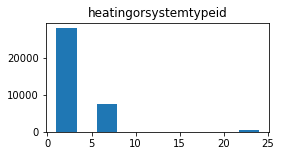

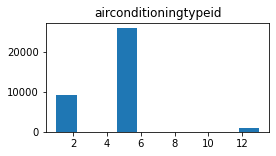

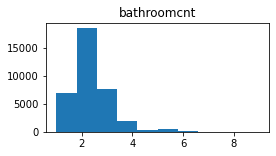

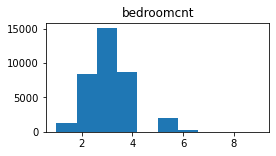

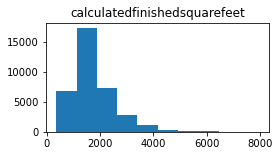

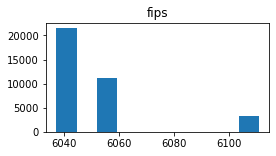

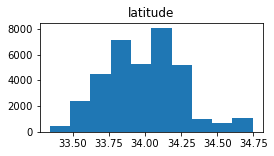

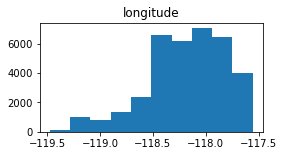

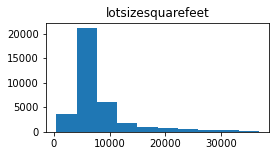

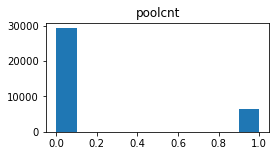

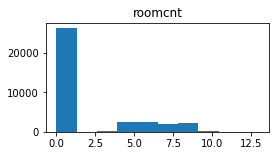

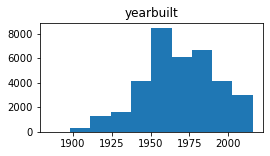

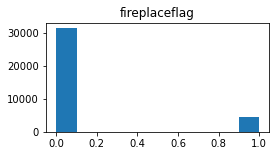

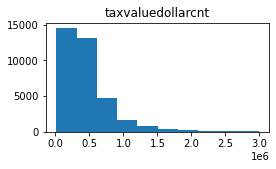

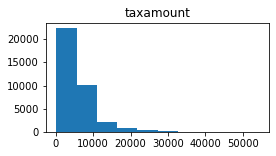

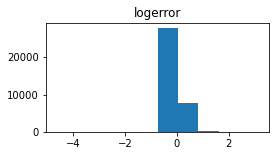

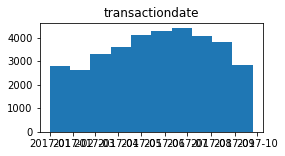

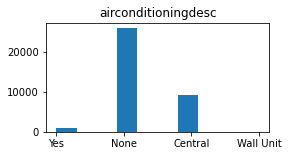

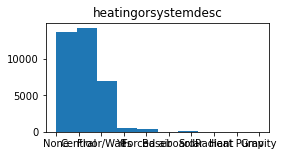

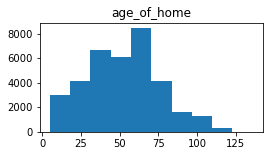

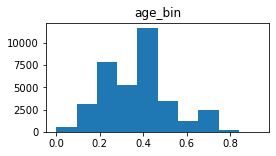

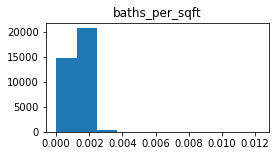

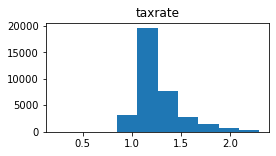

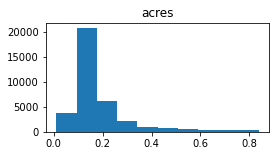

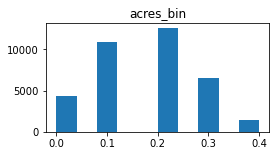

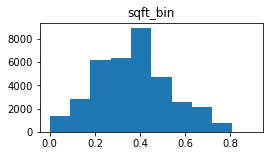

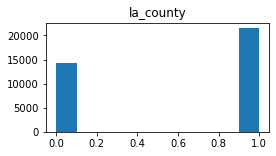

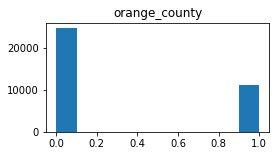

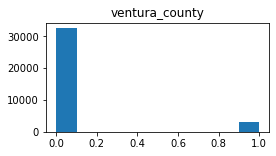

In [37]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

### Takeaways:

- most homes are in LA county

- may have some outliers 
    - tax rate
    - acres
    - logerror
    - tax amount
    - lot size square ft

- most bins have normal distribution

- bathrooms and bedrooms appear to be correlated 

- 


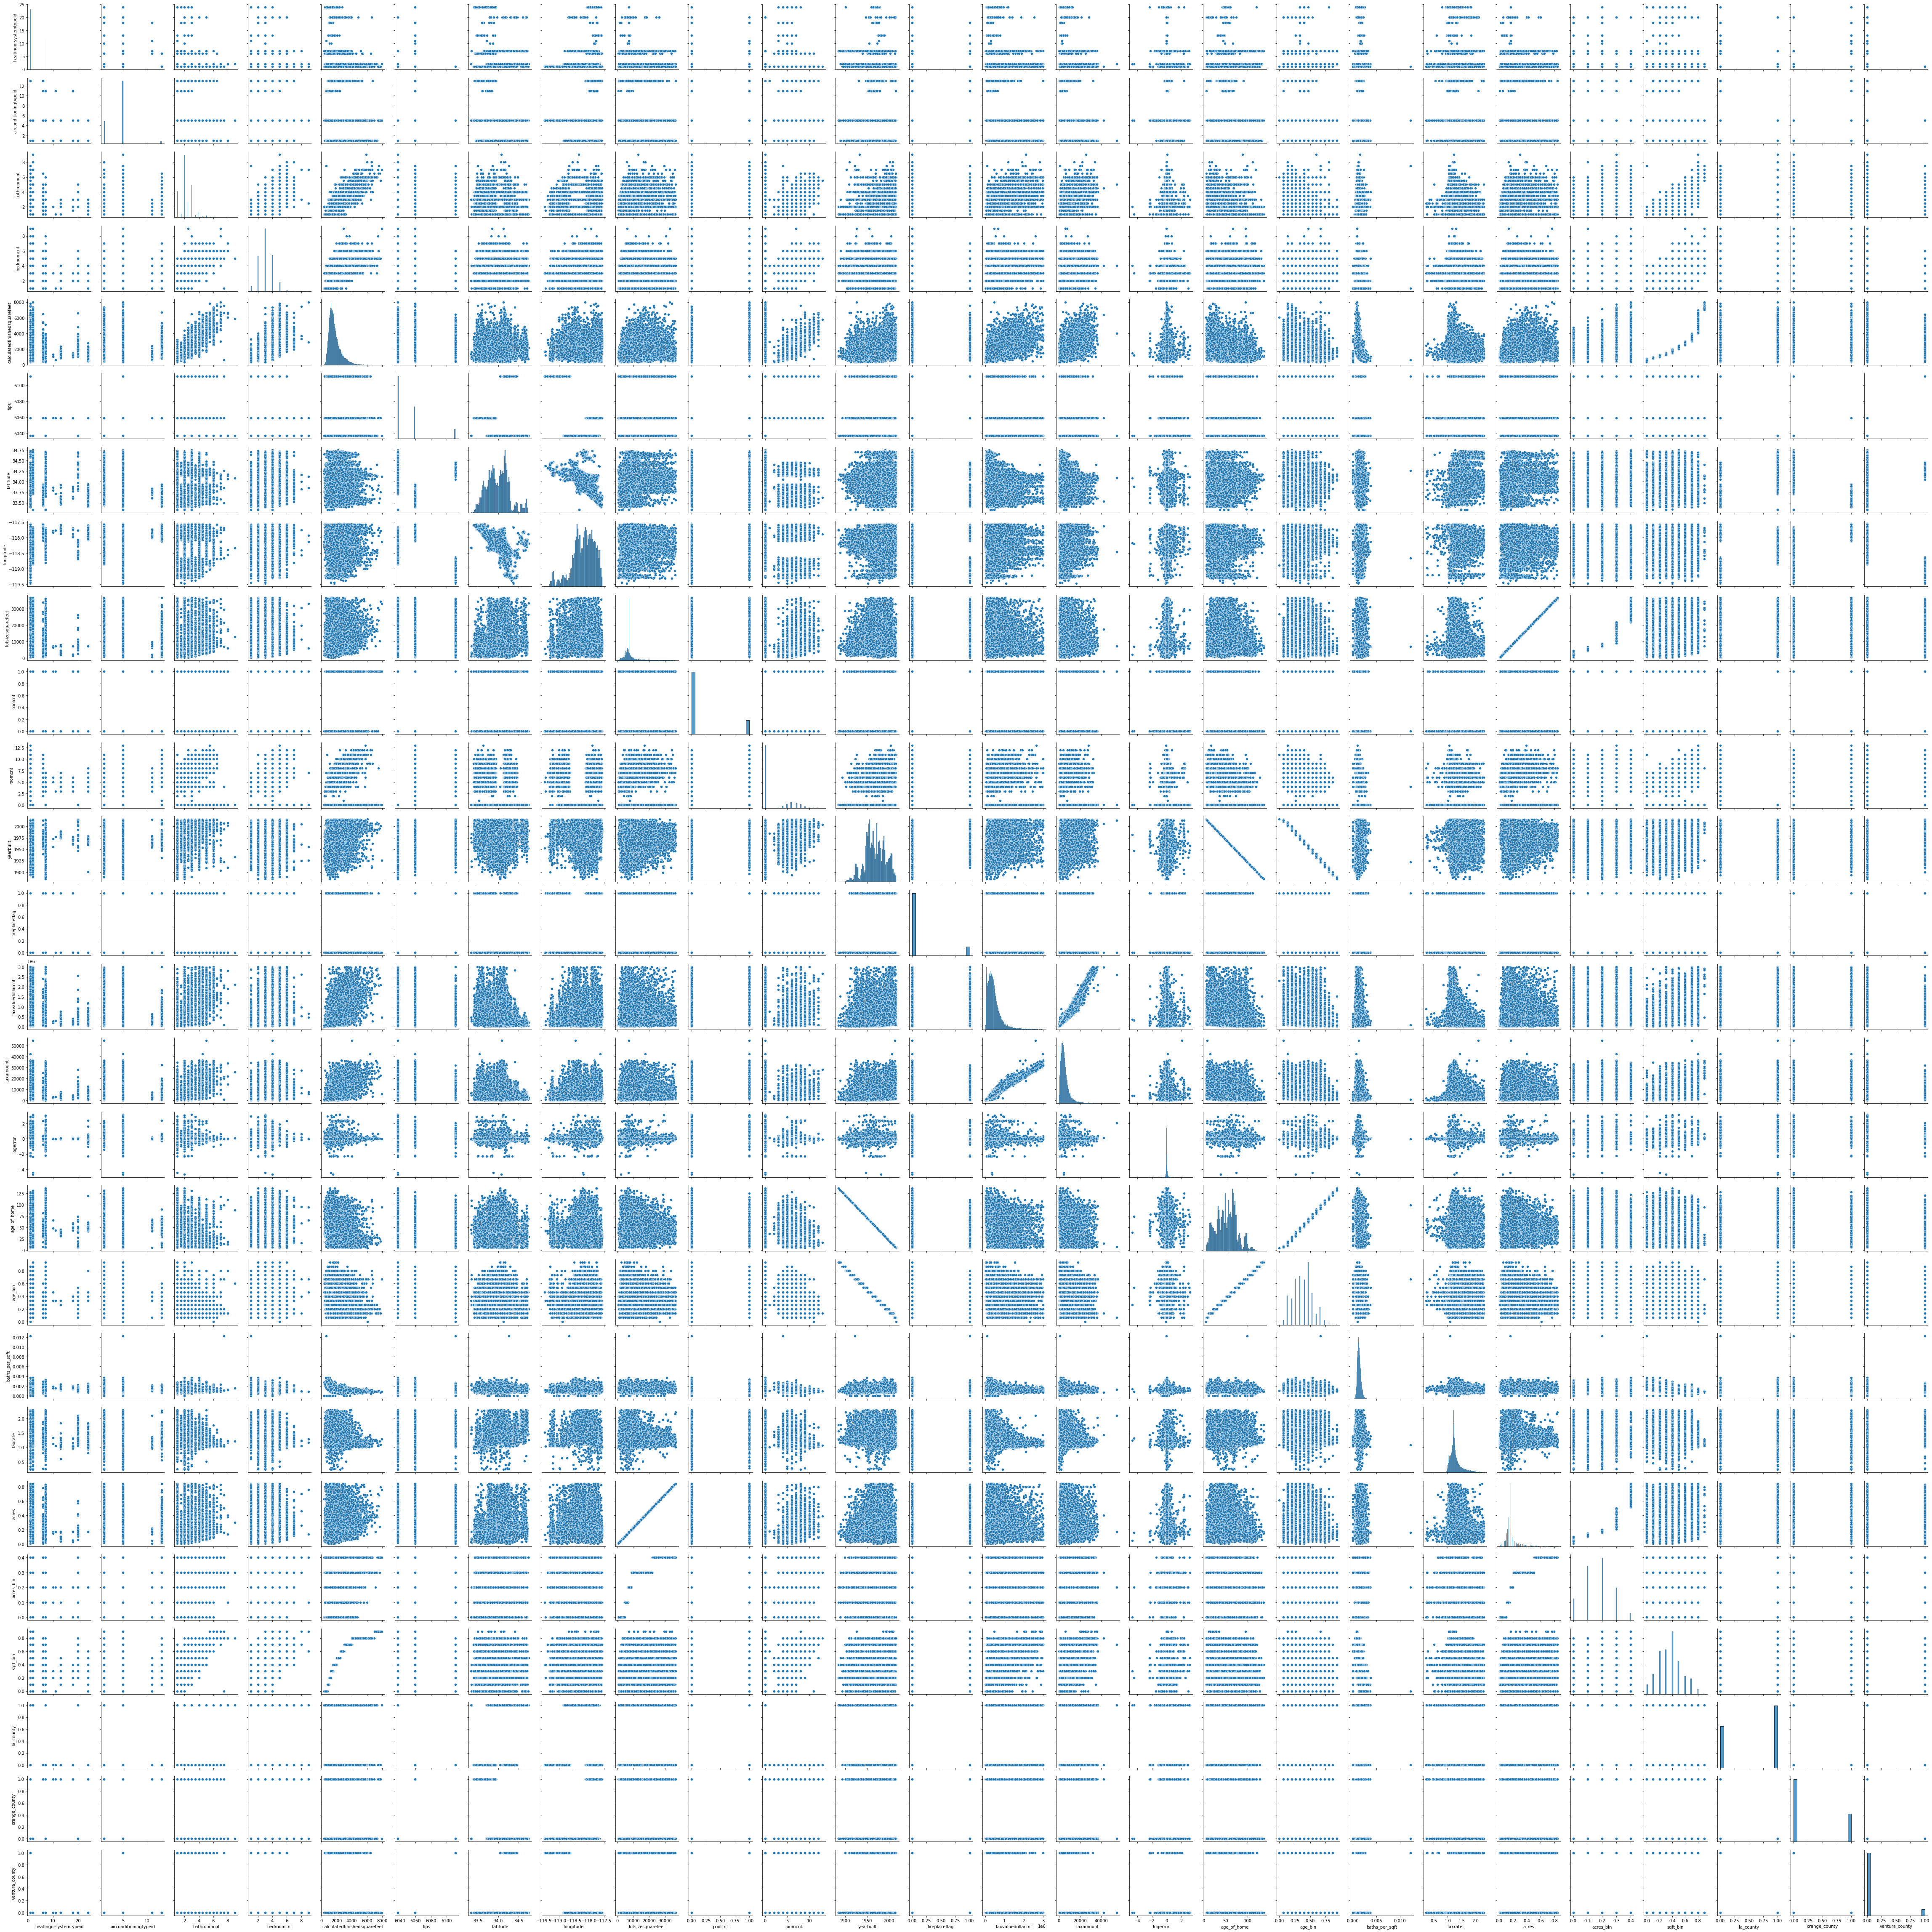

In [38]:
sns.pairplot(train)

In [39]:
train.corr()

heatingorsystemtypeid  airconditioningtypeid  \
heatingorsystemtypeid                          1.00                   0.02   
airconditioningtypeid                          0.02                   1.00   
bathroomcnt                                   -0.30                  -0.20   
bedroomcnt                                    -0.21                  -0.05   
calculatedfinishedsquarefeet                  -0.25                  -0.11   
latitude                                      -0.02                  -0.41   
longitude                                      0.04                   0.17   
lotsizesquarefeet                             -0.08                  -0.23   
poolcnt                                       -0.10                  -0.08   
roomcnt                                       -0.14                   0.39   
fireplaceflag                                 -0.18                   0.22   
taxvaluedollarcnt                             -0.15                  -0.06   
taxamount                                     -0.15                  -0.10   
logerror                                      -0.02                   0.00   
age_of_home                                    0.33                   0.18   
age_bin                                        0.32                   0.18   
baths_per_sqft                                -0.04                  -0.11   
taxrate                                        0.08                  -0.17   
acres                                         -0.08                  -0.23   
acres_bin                                     -0.07                  -0.22   
sqft_bin                                      -0.29                  -0.12   
la_county                                      0.24                  -0.44   
orange_county                                 -0.14                   0.40   
ventura_county                                -0.18                   0.12   

                                      bathroomcnt           bedroomcnt  \
heatingorsystemtypeid                       -0.30                -0.21   
airconditioningtypeid                       -0.20                -0.05   
bathroomcnt                                  1.00                 0.59   
bedroomcnt                                   0.59                 1.00   
calculatedfinishedsquarefeet                 0.80                 0.67   
latitude                                     0.02                 0.10   
longitude                                   -0.00                -0.02   
lotsizesquarefeet                            0.21                 0.04   
poolcnt                                      0.25                 0.22   
roomcnt                                      0.05                 0.20   
fireplaceflag                                0.08                 0.14   
taxvaluedollarcnt                            0.52                 0.28   
taxamount                                    0.52                 0.29   
logerror                                     0.04                 0.03   
age_of_home                                 -0.47                -0.14   
age_bin                                     -0.47                -0.14   
baths_per_sqft                               0.19                -0.25   
taxrate                                     -0.13                 0.01   
acres                                        0.21                 0.04   
acres_bin                                    0.23                 0.09   
sqft_bin                                     0.78                 0.70   
la_county                                   -0.07                -0.04   
orange_county                                0.07                 0.01   
ventura_county                               0.02                 0.05   

                              calculatedfinishedsquarefeet  \
heatingorsystemtypeid                                -0.25   
airconditioningtypeid                                -0.11   
bathroomcnt                               

<AxesSubplot:>

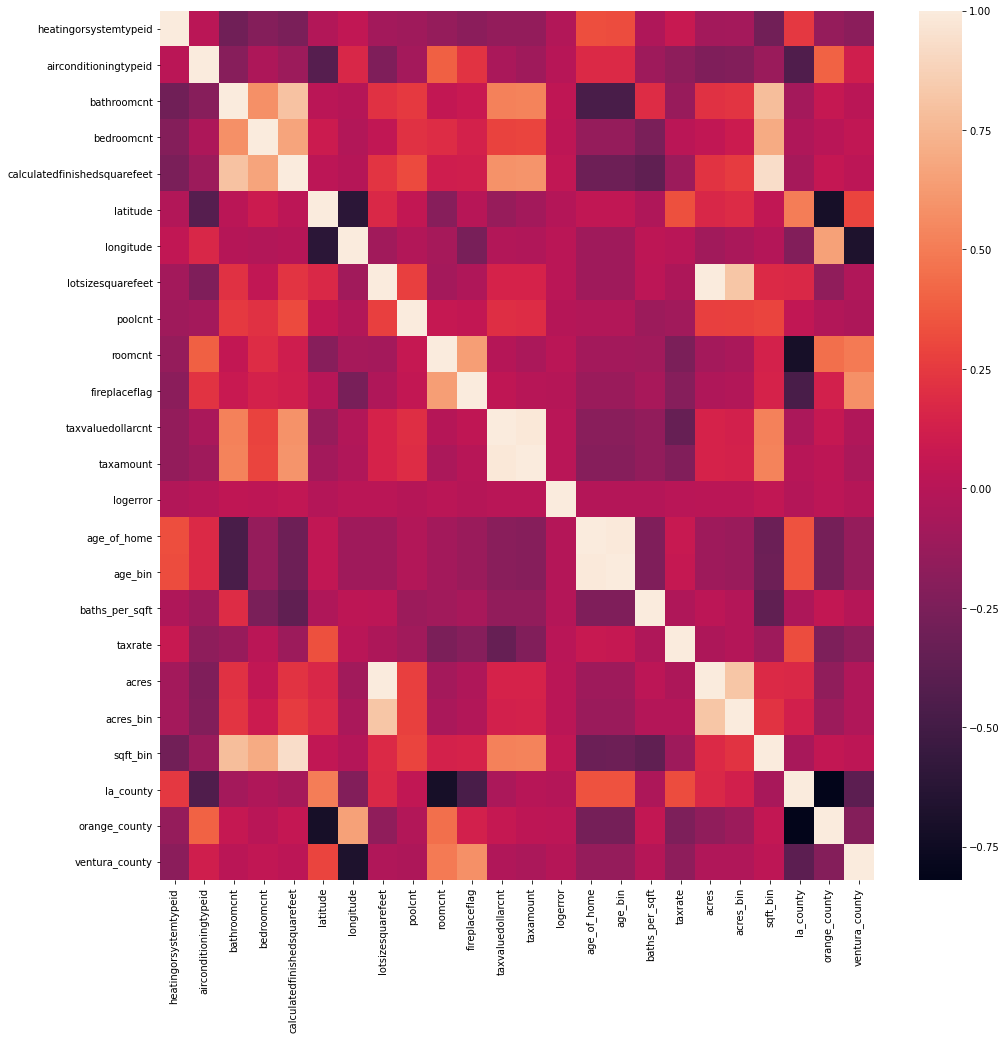

In [40]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr())

In [41]:
df[df.columns[1:]].corr()['logerror'][:]

airconditioningtypeid                          0.01
bathroomcnt                                    0.03
bedroomcnt                                     0.04
calculatedfinishedsquarefeet                   0.04
latitude                                      -0.01
longitude                                      0.01
lotsizesquarefeet                              0.01
poolcnt                                       -0.01
roomcnt                                        0.02
fireplaceflag                                 -0.00
taxvaluedollarcnt                              0.00
taxamount                                      0.00
logerror                                       1.00
age_of_home                                   -0.01
age_bin                                       -0.01
baths_per_sqft                                -0.01
taxrate                                        0.01
acres                                          0.01
acres_bin                                      0.01
sqft_bin    

### Takeaways:

- there does not appear to be anything too strongly correlated with logerror



In [42]:
list(train.columns)

['heatingorsystemtypeid',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'fips',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'roomcnt',
 'yearbuilt',
 'fireplaceflag',
 'taxvaluedollarcnt',
 'taxamount',
 'logerror',
 'transactiondate',
 'airconditioningdesc',
 'heatingorsystemdesc',
 'age_of_home',
 'age_bin',
 'baths_per_sqft',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'la_county',
 'orange_county',
 'ventura_county']

In [43]:
train['tax_bin'] = pd.cut(train.taxrate, [0, 1.16, 1.22, 1.34, 2.30])

# Q1

## Is there any county that has a higher logerror rate?

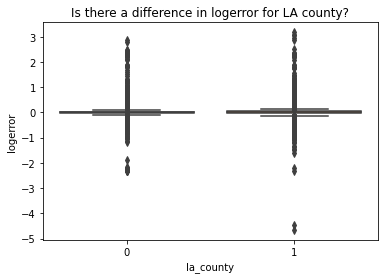

In [44]:
sns.boxplot(train.la_county, train.logerror)
plt.title("Is there a difference in logerror for LA county?")
plt.show()

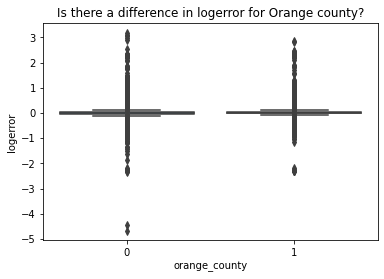

In [45]:
sns.boxplot(train.orange_county, train.logerror)
plt.title("Is there a difference in logerror for Orange county?")
plt.show()

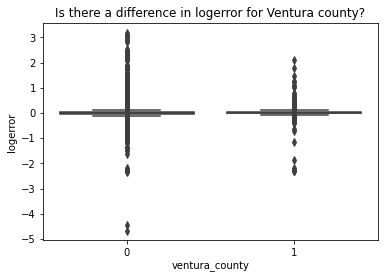

In [46]:
sns.boxplot(train.ventura_county, train.logerror)
plt.title("Is there a difference in logerror for Ventura county?")
plt.show()

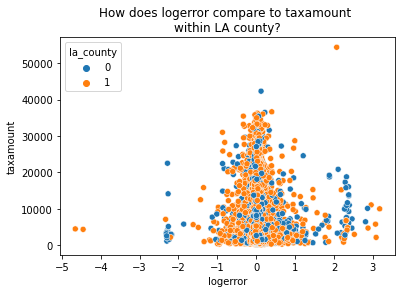

In [47]:
sns.scatterplot(x='logerror', y='taxamount',
               data=train, hue='la_county')
plt.title("How does logerror compare to taxamount \nwithin LA county?")
plt.show()

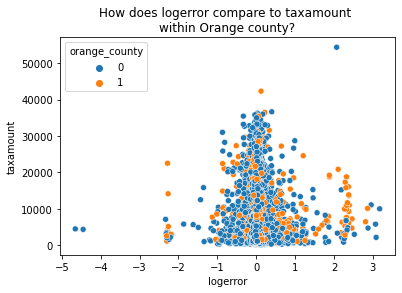

In [48]:
sns.scatterplot(x='logerror', y='taxamount',
               data=train, hue='orange_county')
plt.title("How does logerror compare to taxamount \nwithin Orange county?")
plt.show()

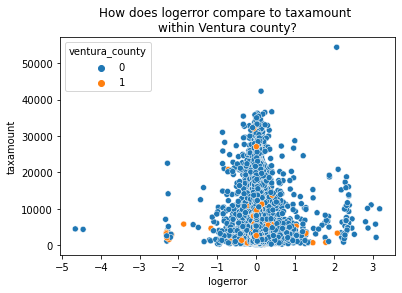

In [49]:
sns.scatterplot(x='logerror', y='taxamount',
               data=train, hue='ventura_county')
plt.title("How does logerror compare to taxamount \nwithin Ventura county?")
plt.show()

#### stats test

In [50]:
null = 'There is no difference in logerror rates between homes in LA and homes not in LA'

alt = 'There is a difference in logerror rates between homes in LA and homes not in LA'

alpha = .05

In [51]:
t, p = stats.ttest_ind(train[train.la_county == 0].logerror, 
                train[train.la_county == 1].logerror,
                equal_var=False
               )
print(t)
print(p)

if p < alpha:
    print(alt)
else:
    print(null)

2.9939138060146506
0.0027566002587581426
There is a difference in logerror rates between homes in LA and homes not in LA


In [52]:
null = 'There is no difference in logerror rates between homes in Orange and homes not in Orange'

alt = 'There is a difference in logerror rates between homes in Orange and homes not in Orange'

alpha = .05

In [53]:
t, p = stats.ttest_ind(train[train.orange_county == 1].logerror, 
                train[train.orange_county == 0].logerror,
                equal_var=False
               )
print(t)
print(p)

if p < alpha:
    print(alt)
else:
    print(null)

3.5141917001961467
0.00044213600655930554
There is a difference in logerror rates between homes in Orange and homes not in Orange


In [54]:
null = 'There is no difference in logerror rates between homes in Ventura and homes not in Ventura'

alt = 'There is a difference in logerror rates between homes in Ventura and homes not in Ventura'

alpha = .05

In [55]:
t, p = stats.ttest_ind(train[train.ventura_county == 0].logerror, 
                train[train.ventura_county == 1].logerror,
                equal_var=False
               )
print(t)
print(p)

if p < alpha:
    print(alt)
else:
    print(null)

0.8621745616569821
0.38864178936853966
There is no difference in logerror rates between homes in Ventura and homes not in Ventura


# Q2 

## Do homes in different age bins have different logerror rates?

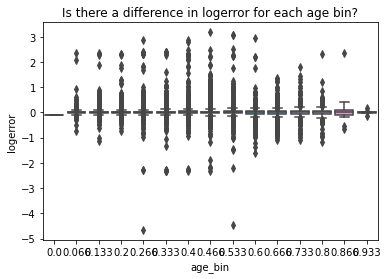

In [56]:
sns.boxplot(train.age_bin, train.logerror)
plt.title("Is there a difference in logerror for each age bin?")
plt.show()

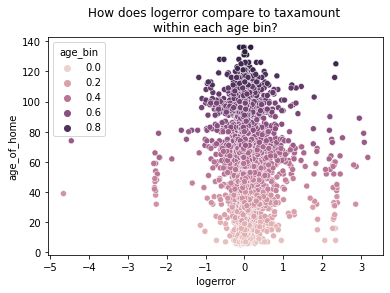

In [57]:
sns.scatterplot(x='logerror', y='age_of_home',
               data=train, hue='age_bin')
plt.title("How does logerror compare to taxamount \nwithin each age bin?")
plt.show()

In [58]:
H0 = 'there is no correlation between the age of a home and the logerror'

H1 = 'there is a correlation between the age of a home and the logerror'

alpha = .05

In [59]:
corr, p = stats.pearsonr(train.age_of_home, train.logerror)
corr, p

(-0.013019082685015821, 0.013722555056943586)

In [60]:
## with this test we can not reject the null, but only just barely

In [61]:
train.age_of_home.describe()

count              35,832.00
mean                   52.59
std                    23.35
min                     5.00
25%                    34.00
50%                    53.00
75%                    68.00
max                   136.00
Name: age_of_home, dtype: float64

In [62]:
old_homes = train[train.age_of_home > 67.00]

In [63]:
old_homes.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
parcelid                                                                      
10854047                   2.00                   5.00                 2.00   
12883861                   7.00                   5.00                 1.00   
12458233                   7.00                   5.00                 1.00   
11900733                   7.00                   5.00                 2.00   
12359021                   2.00                   1.00                 1.00   

                   bedroomcnt  calculatedfinishedsquarefeet  fips  \
parcelid                                                            
10854047                 2.00                      1,500.00  6037   
12883861                 2.00                        920.00  6037   
12458233                 1.00                        598.00  6037   
11900733                 2.00                      1,708.00  6037   
12359021                 2.00                        808.00  6037   

                     latitude            longitude    lotsizesquarefeet  \
parcelid                                                                  
10854047                34.16              -118.48            10,119.00   
12883861                34.06              -117.76             6,886.00   
12458233                33.85              -118.19             2,269.00   
11900733                34.09              -118.12             9,738.00   
12359021                33.99              -118.20             4,997.00   

                      poolcnt  ...              age_bin       baths_per_sqft  \
parcelid                       ...                                             
10854047                 0.00  ...                 0.47                 0.00   
12883861                 0.00  ...                 0.60                 0.00   
12458233                 0.00  ...                 0.67                 0.00   
11900733                 1.00  ...                 0.73                 0.00   
12359021                 0.00  ...                 0.67                 0.00   

                      taxrate                acres            acres_bin  \
parcelid                                                                  
10854047                 1.23                 0.23                 0.30   
12883861                 1.26                 0.16                 0.20   
12458233                 1.22                 0.05                 0.00   
11900733                 1.64                 0.22                 0.30   
12359021                 2.10                 0.11                 0.10   

                     sqft_bin la_county orange_county ventura_county  \
parcelid                                                               
10854047                 0.30         1             0              0   
12883861                 0.10         1             0              0   
12458233                 0.00         1             0              0   
11900733                 0.40         1             0              0   
12359021                 0.10         1             0              0   

               tax_bin  
parcelid                
10854047  (1.22, 1.34]  
12883861  (1.22, 1.34]  
12458233  (1.16, 1.22]  
11900733   (1.34, 2.3]  
12359021   (1.34, 2.3]  

[5 rows x 30 columns]

In [64]:
old_homes.shape

(9460, 30)

In [65]:
H0 = '''there is no difference in the logerror between homes in the 4th quartile of home age 
        and the general population'''

H1 = '''there is a difference in the logerror between homes in the 4th quartile of home age  
        and the general population'''

alpha = .05


In [66]:
t, p = stats.ttest_1samp(train.logerror, old_homes.logerror.mean())

print(f't = {t:.3f}')
print(f'p = {p:.3f}')

if p < alpha:
    print(H1)
else:
    print(H0)


t = 5.251
p = 0.000
there is a difference in the logerror between homes in the 4th quartile of home age  
        and the general population


# Q3 

## Does Acres across counties have an impact on logerror?

In [67]:
la_train = train[train.la_county == 1]

In [68]:
la_train.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
parcelid                                                                      
10854047                   2.00                   5.00                 2.00   
12883861                   7.00                   5.00                 1.00   
10913577                   2.00                   1.00                 3.00   
11161185                   2.00                   1.00                 1.00   
11265588                   2.00                   1.00                 3.00   

                   bedroomcnt  calculatedfinishedsquarefeet  fips  \
parcelid                                                            
10854047                 2.00                      1,500.00  6037   
12883861                 2.00                        920.00  6037   
10913577                 2.00                      2,085.00  6037   
11161185                 3.00                      1,040.00  6037   
11265588                 5.00                      3,255.00  6037   

                     latitude            longitude    lotsizesquarefeet  \
parcelid                                                                  
10854047                34.16              -118.48            10,119.00   
12883861                34.06              -117.76             6,886.00   
10913577                34.15              -118.41            31,000.00   
11161185                34.45              -118.39             6,869.00   
11265588                34.66              -118.17            24,156.00   

                      poolcnt  ...              age_bin       baths_per_sqft  \
parcelid                       ...                                             
10854047                 0.00  ...                 0.47                 0.00   
12883861                 0.00  ...                 0.60                 0.00   
10913577                 0.00  ...                 0.20                 0.00   
11161185                 0.00  ...                 0.33                 0.00   
11265588                 0.00  ...                 0.13                 0.00   

                      taxrate                acres            acres_bin  \
parcelid                                                                  
10854047                 1.23                 0.23                 0.30   
12883861                 1.26                 0.16                 0.20   
10913577                 1.22                 0.71                 0.40   
11161185                 1.54                 0.16                 0.20   
11265588                 1.32                 0.55                 0.40   

                     sqft_bin la_county orange_county ventura_county  \
parcelid                                                               
10854047                 0.30         1             0              0   
12883861                 0.10         1             0              0   
10913577                 0.50         1             0              0   
11161185                 0.20         1             0              0   
11265588                 0.70         1             0              0   

               tax_bin  
parcelid                
10854047  (1.22, 1.34]  
12883861  (1.22, 1.34]  
10913577  (1.22, 1.34]  
11161185   (1.34, 2.3]  
11265588  (1.22, 1.34]  

[5 rows x 30 columns]

In [69]:
la_train.shape

(21504, 30)

In [70]:
orange_train = train[train.orange_county == 1]

In [71]:
orange_train.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
parcelid                                                                      
13853852                   1.00                  13.00                 2.00   
14065017                   1.00                   5.00                 3.00   
14371017                   1.00                  13.00                 2.00   
13982010                   1.00                   5.00                 2.50   
14623190                  24.00                   1.00                 1.50   

                   bedroomcnt  calculatedfinishedsquarefeet  fips  \
parcelid                                                            
13853852                 2.00                      1,231.00  6059   
14065017                 4.00                      2,615.00  6059   
14371017                 4.00                      1,872.00  6059   
13982010                 4.00                      2,625.00  6059   
14623190                 2.00                      1,117.00  6059   

                     latitude            longitude    lotsizesquarefeet  \
parcelid                                                                  
13853852                33.92              -117.97             1,739.00   
14065017                33.70              -118.03             8,640.00   
14371017                33.63              -117.69             7,380.00   
13982010                33.65              -117.89             8,880.00   
14623190                33.61              -117.73             7,281.00   

                      poolcnt  ...              age_bin       baths_per_sqft  \
parcelid                       ...                                             
13853852                 0.00  ...                 0.40                 0.00   
14065017                 1.00  ...                 0.33                 0.00   
14371017                 0.00  ...                 0.40                 0.00   
13982010                 1.00  ...                 0.47                 0.00   
14623190                 0.00  ...                 0.33                 0.00   

                      taxrate                acres            acres_bin  \
parcelid                                                                  
13853852                 1.30                 0.04                 0.00   
14065017                 1.13                 0.20                 0.20   
14371017                 1.05                 0.17                 0.20   
13982010                 1.08                 0.20                 0.20   
14623190                 1.04                 0.17                 0.20   

                     sqft_bin la_county orange_county ventura_county  \
parcelid                                                               
13853852                 0.20         0             1              0   
14065017                 0.60         0             1              0   
14371017                 0.40         0             1              0   
13982010                 0.60         0             1              0   
14623190                 0.20         0             1              0   

               tax_bin  
parcelid                
13853852  (1.22, 1.34]  
14065017   (0.0, 1.16]  
14371017   (0.0, 1.16]  
13982010   (0.0, 1.16]  
14623190   (0.0, 1.16]  

[5 rows x 30 columns]

In [72]:
orange_train.shape

(11088, 30)

In [73]:
ventura_train = train[train.ventura_county == 1]

In [74]:
ventura_train.head()

heatingorsystemtypeid  airconditioningtypeid          bathroomcnt  \
parcelid                                                                      
17172368                   1.00                   5.00                 3.00   
17147571                   1.00                   5.00                 2.00   
17160115                   1.00                   5.00                 1.00   
17289908                   1.00                   5.00                 2.50   
17184749                   1.00                   5.00                 2.00   

                   bedroomcnt  calculatedfinishedsquarefeet  fips  \
parcelid                                                            
17172368                 3.00                      2,770.00  6111   
17147571                 3.00                      1,955.00  6111   
17160115                 3.00                      1,098.00  6111   
17289908                 3.00                      1,645.00  6111   
17184749                 3.00                      1,180.00  6111   

                     latitude            longitude    lotsizesquarefeet  \
parcelid                                                                  
17172368                34.17              -119.23             2,450.00   
17147571                34.22              -119.20             8,610.00   
17160115                34.21              -119.19             6,240.00   
17289908                34.18              -118.79             7,281.00   
17184749                34.16              -119.17             5,613.00   

                      poolcnt  ...              age_bin       baths_per_sqft  \
parcelid                       ...                                             
17172368                 0.00  ...                 0.13                 0.00   
17147571                 0.00  ...                 0.27                 0.00   
17160115                 0.00  ...                 0.47                 0.00   
17289908                 0.00  ...                 0.27                 0.00   
17184749                 0.00  ...                 0.33                 0.00   

                      taxrate                acres            acres_bin  \
parcelid                                                                  
17172368                 1.12                 0.06                 0.00   
17147571                 1.21                 0.20                 0.20   
17160115                 1.20                 0.14                 0.10   
17289908                 1.18                 0.17                 0.20   
17184749                 1.17                 0.13                 0.10   

                     sqft_bin la_county orange_county ventura_county  \
parcelid                                                               
17172368                 0.60         0             0              1   
17147571                 0.40         0             0              1   
17160115                 0.20         0             0              1   
17289908                 0.40         0             0              1   
17184749                 0.20         0             0              1   

               tax_bin  
parcelid                
17172368   (0.0, 1.16]  
17147571  (1.16, 1.22]  
17160115  (1.16, 1.22]  
17289908  (1.16, 1.22]  
17184749  (1.16, 1.22]  

[5 rows x 30 columns]

In [75]:
ventura_train.shape

(3240, 30)

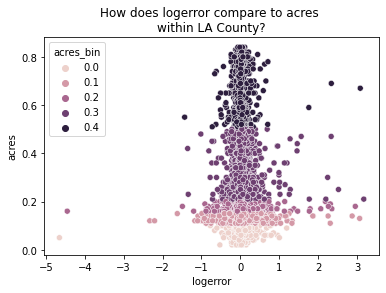

In [76]:
sns.scatterplot(x='logerror', y='acres',
               data=la_train, hue='acres_bin')
plt.title("How does logerror compare to acres \nwithin LA County?")
plt.show()

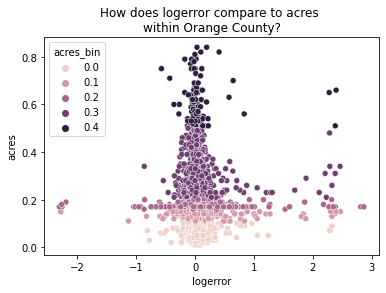

In [77]:
sns.scatterplot(x='logerror', y='acres',
               data=orange_train, hue='acres_bin')
plt.title("How does logerror compare to acres \nwithin Orange County?")
plt.show()

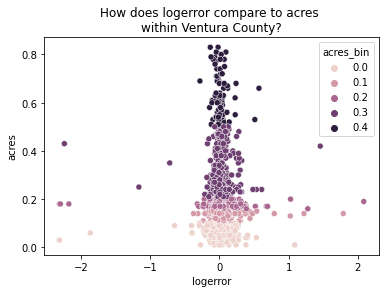

In [78]:
sns.scatterplot(x='logerror', y='acres',
               data=ventura_train, hue='acres_bin')
plt.title("How does logerror compare to acres \nwithin Ventura County?")
plt.show()

In [79]:
## across oll 3 counties logerror seems to have the most significant range on homes with smaller acres

# Q4

## Does age across counties make a difference in logerror rates?

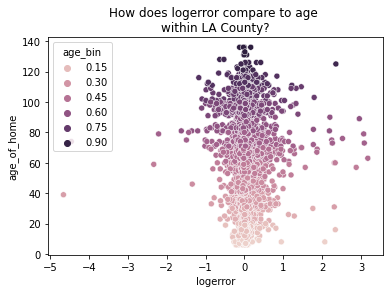

In [80]:
sns.scatterplot(x='logerror', y='age_of_home',
               data=la_train, hue='age_bin')
plt.title("How does logerror compare to age \nwithin LA County?")
plt.show()

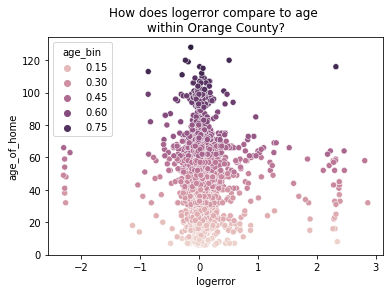

In [81]:
sns.scatterplot(x='logerror', y='age_of_home',
               data=orange_train, hue='age_bin')
plt.title("How does logerror compare to age \nwithin Orange County?")
plt.show()

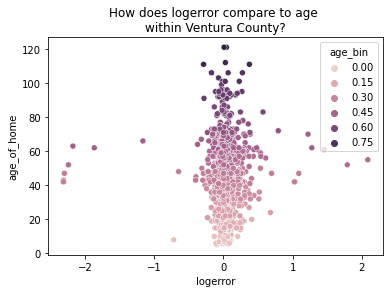

In [82]:
sns.scatterplot(x='logerror', y='age_of_home',
               data=ventura_train, hue='age_bin')
plt.title("How does logerror compare to age \nwithin Ventura County?")
plt.show()

In [83]:
## LA appears to have more positive logerrors than any other county

## Orange appears to have the most negative logerrors than any other county

## however there doesn't appear to be a strong trend with age other than older homes have lower logerrors

# Q5

## Does tax amount across counties make a difference in logerror rates?

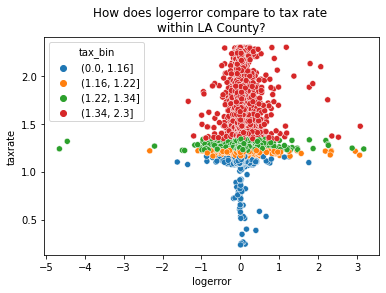

In [84]:
sns.scatterplot(x='logerror', y='taxrate',
               data=la_train, hue='tax_bin')
plt.title("How does logerror compare to tax rate \nwithin LA County?")
plt.show()

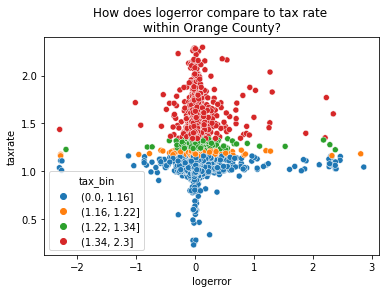

In [85]:
sns.scatterplot(x='logerror', y='taxrate',
               data=orange_train, hue='tax_bin')
plt.title("How does logerror compare to tax rate \nwithin Orange County?")
plt.show()

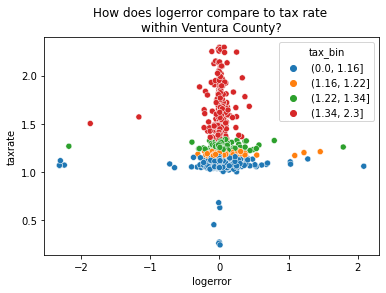

In [86]:
sns.scatterplot(x='logerror', y='taxrate',
               data=ventura_train, hue='tax_bin')
plt.title("How does logerror compare to tax rate \nwithin Ventura County?")
plt.show()

In [87]:
## widest range of logerror appears to be in the center of tax rates

# Q6

## Does room count affect log error across counties?

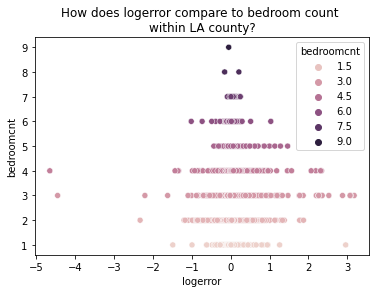

In [88]:
sns.scatterplot(x='logerror', y='bedroomcnt',
               data=la_train, hue='bedroomcnt')
plt.title("How does logerror compare to bedroom count \nwithin LA county?")
plt.show()

<AxesSubplot:>

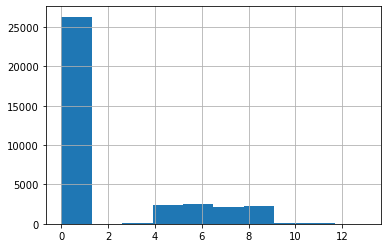

In [89]:
train.roomcnt.hist()

<AxesSubplot:>

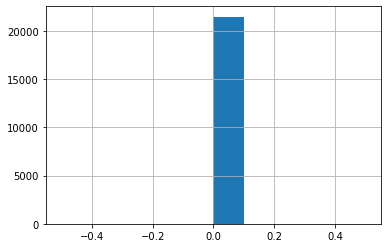

In [90]:
la_train.roomcnt.hist()

<AxesSubplot:>

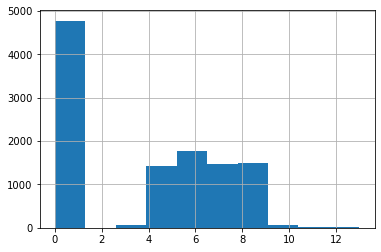

In [91]:
orange_train.roomcnt.hist()

<AxesSubplot:>

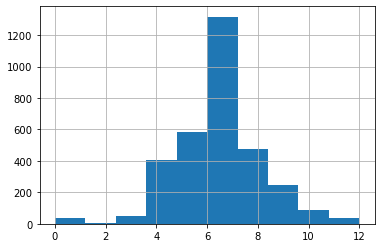

In [92]:
ventura_train.roomcnt.hist()

In [93]:
## room count appears to have many 0 counts, may need to be removed 